# EDA Report on Token Paid

## Metadata for Dataset

### Dataset Overview
- **Name:** Tokens Paid.csv
- **Description:** This dataset contains information about leads, including their creation and payment dates, sources, cohorts, and associated agents/counselors.

### Field Descriptions

| Field Name         | Data Type   | Description                                                                             |
|--------------------|-------------|-----------------------------------------------------------------------------------------|
| `lead_id`          | Integer     | Unique identifier for each lead.                                                        |
    | `created_date`     | DateTime    | The date when the lead was created.                                                     |
| `paid_date`        | DateTime    | The date when the payment was made or the lead was converted.                           |
| `source`           | String      | The origin or source of the lead (e.g., website, referral).                             |
| `cohort`           | String      | The group or batch identifier associated with the lead, possibly indicating a time period or campaign. |
| `agent`            | String      | The name of the agent who handled the lead.                                             |
| `counsellor`       | String      | The name of the counselor associated with the lead.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Tokens Paid.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              267 non-null    object 
 1   Lead ID           121 non-null    object 
 2   created_date      266 non-null    object 
 3   paid_date         267 non-null    object 
 4   cohort            267 non-null    object 
 5   source            262 non-null    object 
 6   agent             267 non-null    object 
 7   counsellor        265 non-null    object 
 8   prospect_id       265 non-null    object 
 9   upload_timestamp  0 non-null      float64
 10  status            241 non-null    object 
dtypes: float64(1), object(10)
memory usage: 23.1+ KB


## Data Cleaning

In [6]:
df.drop('upload_timestamp',axis=1,inplace=True)

In [7]:
df.shape

(267, 10)

In [8]:
df.isnull().sum()

Name              0
Lead ID         146
created_date      1
paid_date         0
cohort            0
source            5
agent             0
counsellor        2
prospect_id       2
status           26
dtype: int64

In [9]:
#filling the missing values with same values as paid_date
df.loc[df['created_date'] == pd.NaT, 'created_date'] = df.loc[df['created_date'] == pd.NaT, 'paid_date']
#filling missing value in source with mode
df['source'].fillna(df['source'].mode()[0], inplace=True)
#filling missing values in counsellors with mode
df['counsellor'].fillna(df['counsellor'].mode()[0],inplace=True)

## Feature Engineering

In [11]:
# Creating the lead time column
df['created_date']=pd.to_datetime(df['created_date'])
df['paid_date']=pd.to_datetime(df['paid_date'])
df['lead time']=df['paid_date']-df['created_date']

In [12]:
# Filter out rows where lead time is negative
df = df[df['lead time'] >= pd.Timedelta(0)]

In [13]:
df['lead time'].describe()

count                           264
mean     44 days 01:16:21.818181818
std      60 days 08:59:52.581359467
min                 0 days 00:00:00
25%                 6 days 00:00:00
50%                19 days 00:00:00
75%                54 days 06:00:00
max               390 days 00:00:00
Name: lead time, dtype: object

In [14]:
df['lead time'] = df['lead time'].astype(str)
df['days'] = df['lead time'].str.extract(r'(\d+) days')

In [15]:
df['days'] = df['days'].fillna(0).astype(int)
# to remove the negative values
df = df[df['days'] > 0]

In [16]:
df['created_month']=df['created_date'].dt.month
df['paid_month']=df['paid_date'].dt.month

In [17]:
df['created_day']=df['created_date'].dt.day_name()
df['paid_day']=df['paid_date'].dt.day_name()

In [18]:
df.isnull().sum()

Name               0
Lead ID          137
created_date       0
paid_date          0
cohort             0
source             0
agent              0
counsellor         0
prospect_id        2
status            25
lead time          0
days               0
created_month      0
paid_month         0
created_day        0
paid_day           0
dtype: int64

## Univariate Analysis

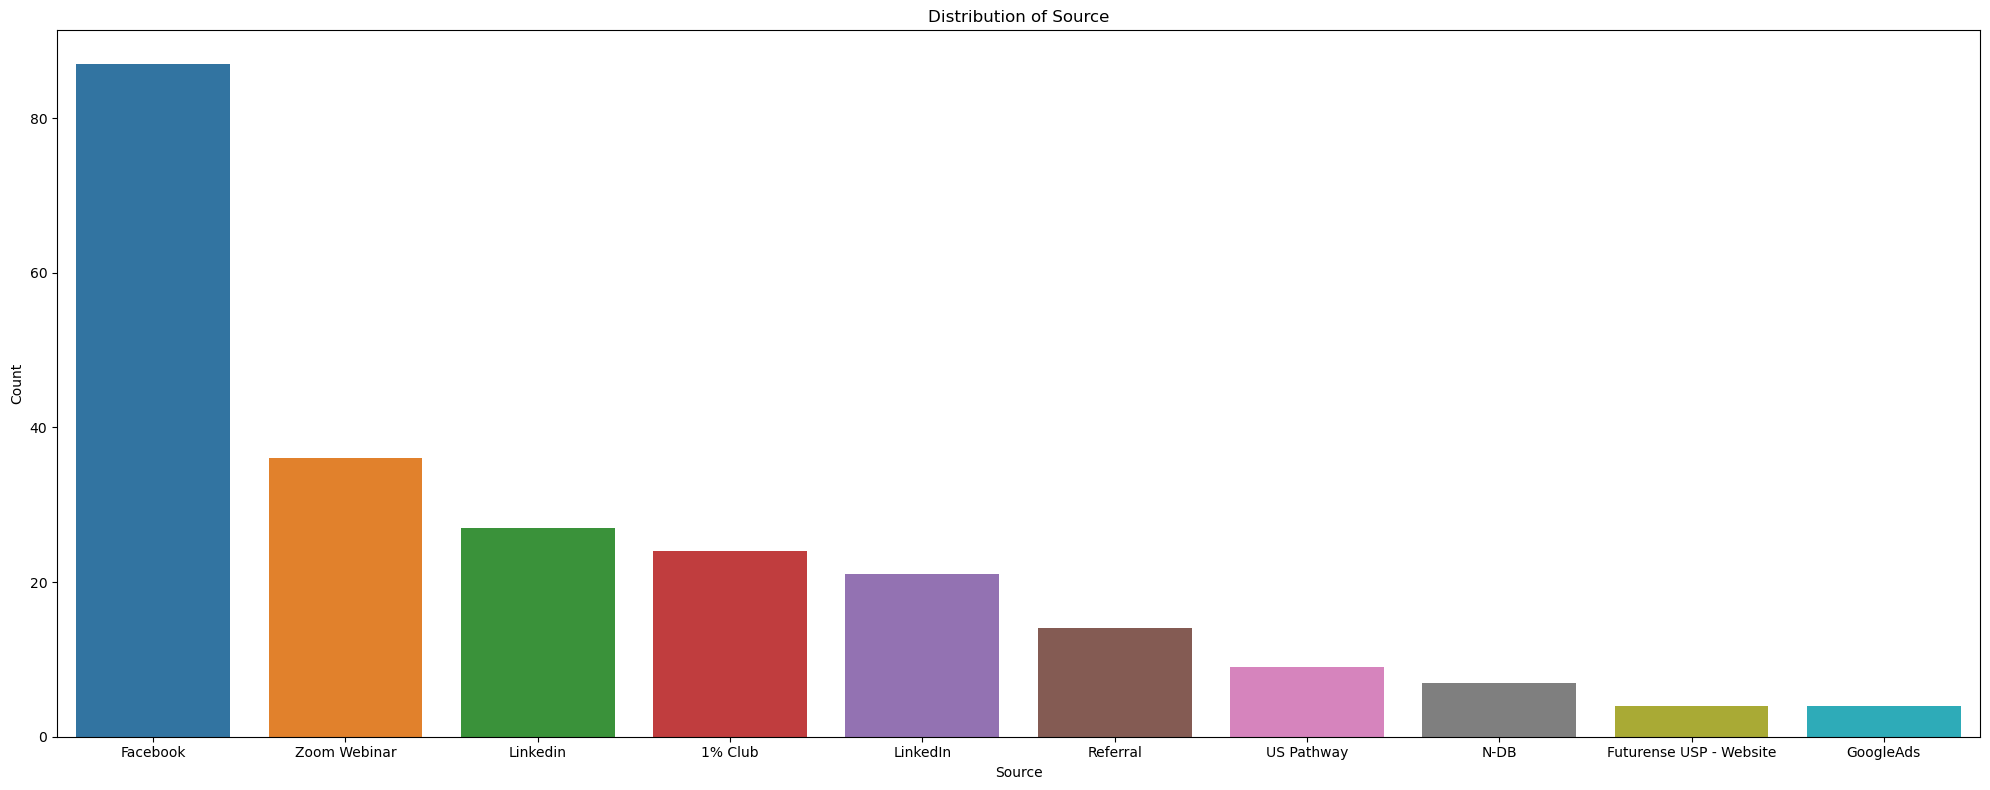

In [19]:
#Distribution of Source
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='source', data=df,order=df['source'].value_counts().nlargest(10).index)
ax.set_title('Distribution of Source')
ax.set_xlabel('Source')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

We see that there more people are attracted from Facebook and there is huge difference in between Facebook and others

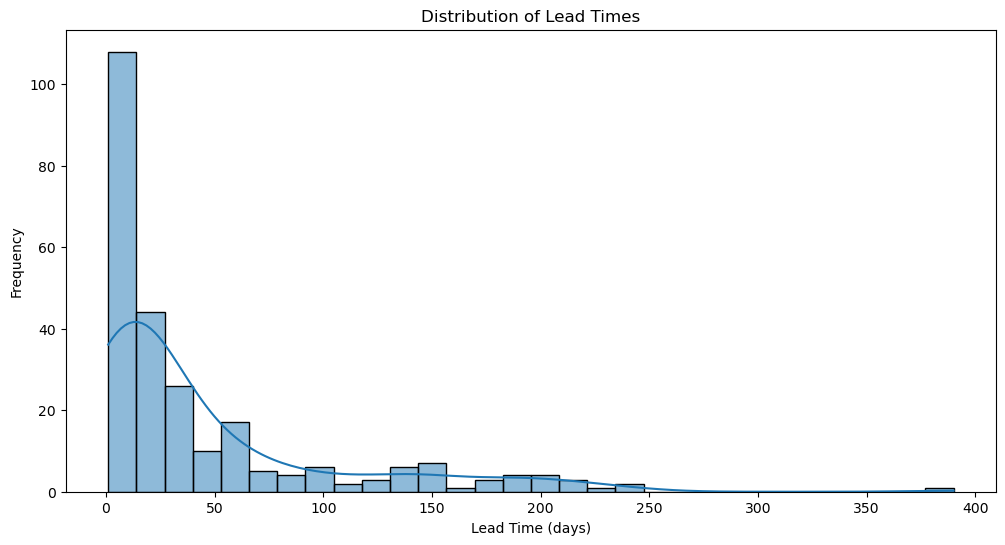

In [29]:
#Lead Time Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['days'], bins=30, kde=True)
plt.title('Distribution of Lead Times')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

We see that most of the people most of the people have paid on the same day they registered,also there is a gradually started decreasing till 50 days of period and there are some irregularities in the payment time

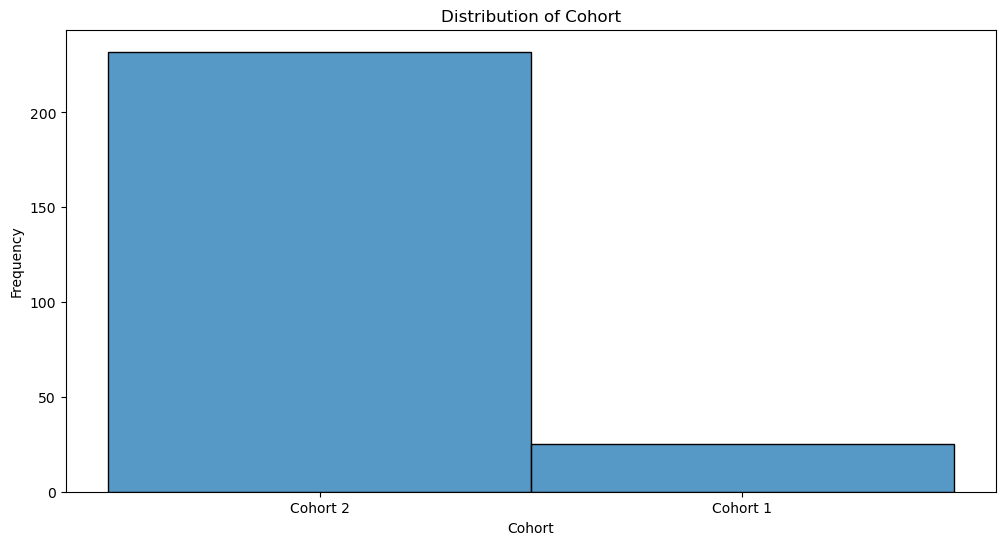

In [28]:
#Cohort Time Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['cohort'], bins=30)
plt.title('Distribution of Cohort')
plt.xlabel('Cohort')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis

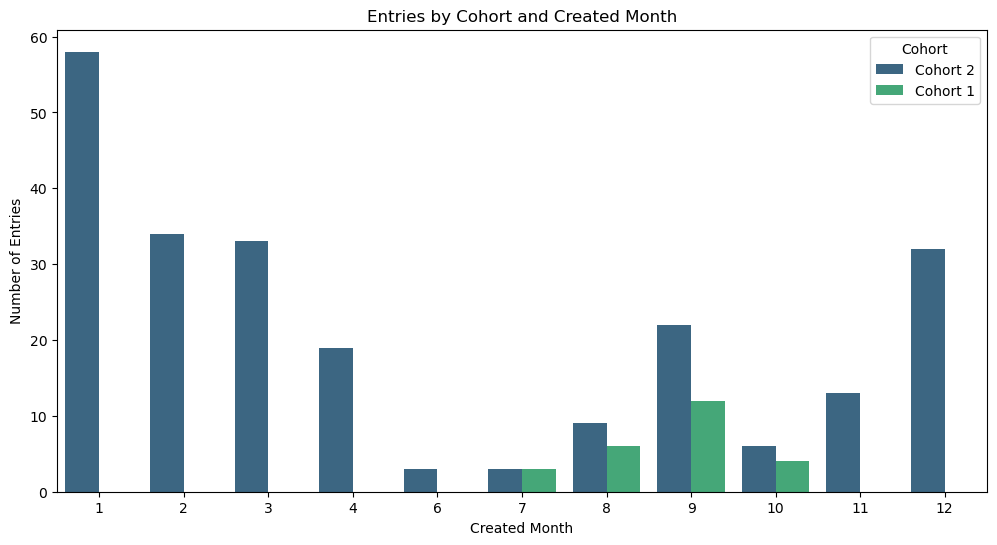

In [27]:
# Cohort and Monthly Trends
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='created_month', hue='cohort', palette='viridis')
plt.title('Entries by Cohort and Created Month')
plt.xlabel('Created Month')
plt.ylabel('Number of Entries')
plt.legend(title='Cohort')
plt.show()

In [23]:
agent_avg = df.groupby('agent')['days'].mean().reset_index()
top_agents = agent_avg.sort_values(by='days', ascending=False).head(10)['agent']
df_top_agents = df[df['agent'].isin(top_agents)]

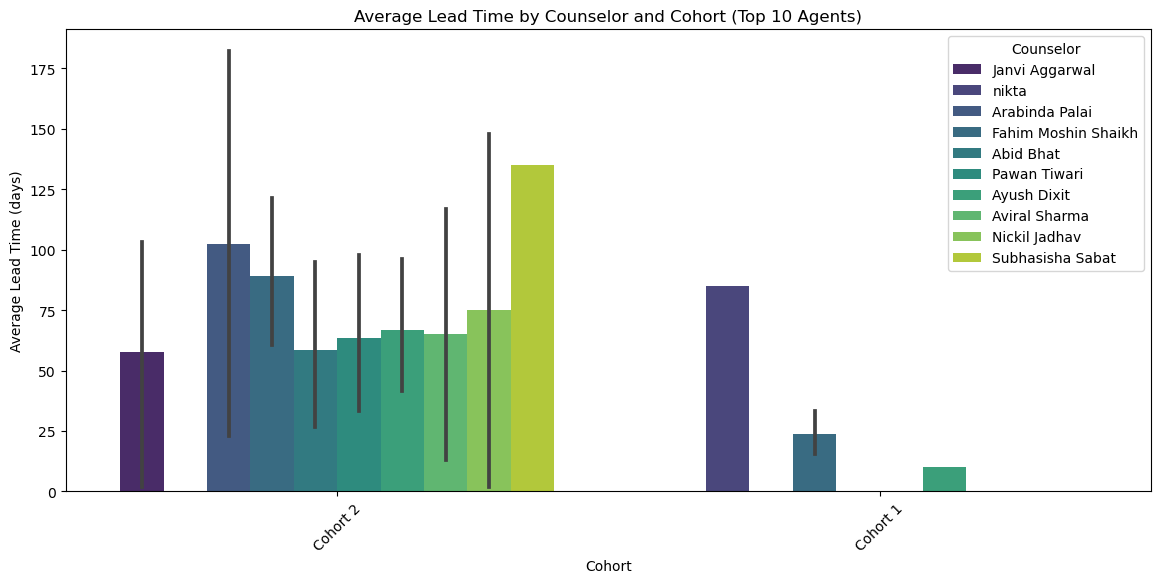

In [26]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_top_agents, x='cohort', y='days', hue='agent', palette='viridis')
plt.title('Average Lead Time by Counselor and Cohort (Top 10 Agents)')
plt.xlabel('Cohort')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=45)
plt.legend(title='Counselor', loc='upper right')
plt.show()

In [25]:
bottom_agents = agent_avg.sort_values(by='days', ascending=True).head(10)['agent']
df_bottom_agents = df[df['agent'].isin(bottom_agents)]

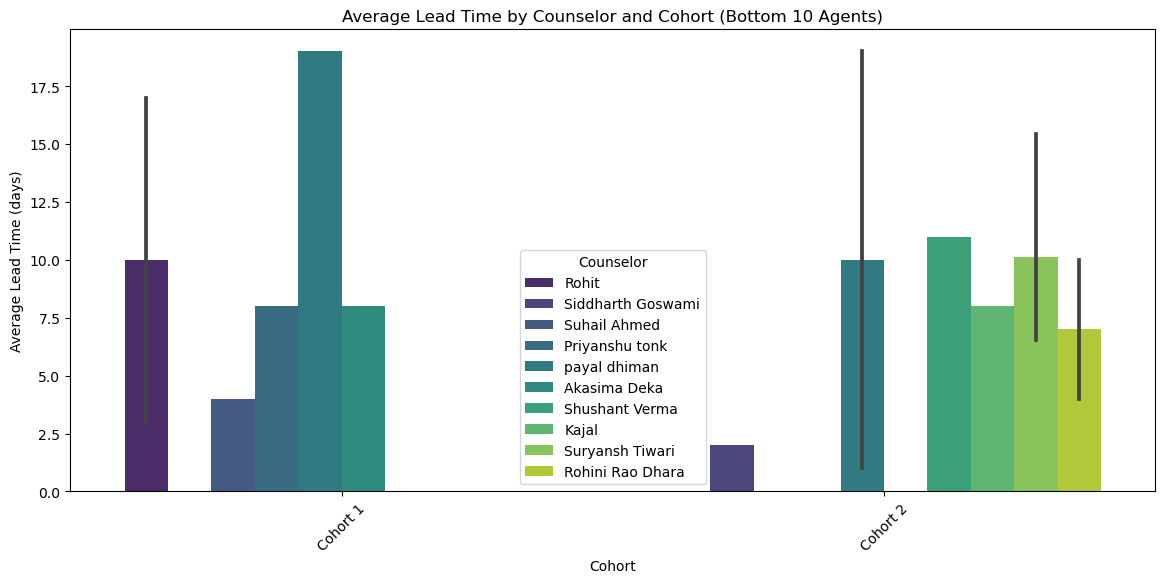

In [30]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_bottom_agents, x='cohort', y='days', hue='agent', palette='viridis')
plt.title('Average Lead Time by Counselor and Cohort (Bottom 10 Agents)')
plt.xlabel('Cohort')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=45)
plt.legend(title='Counselor')
plt.show()

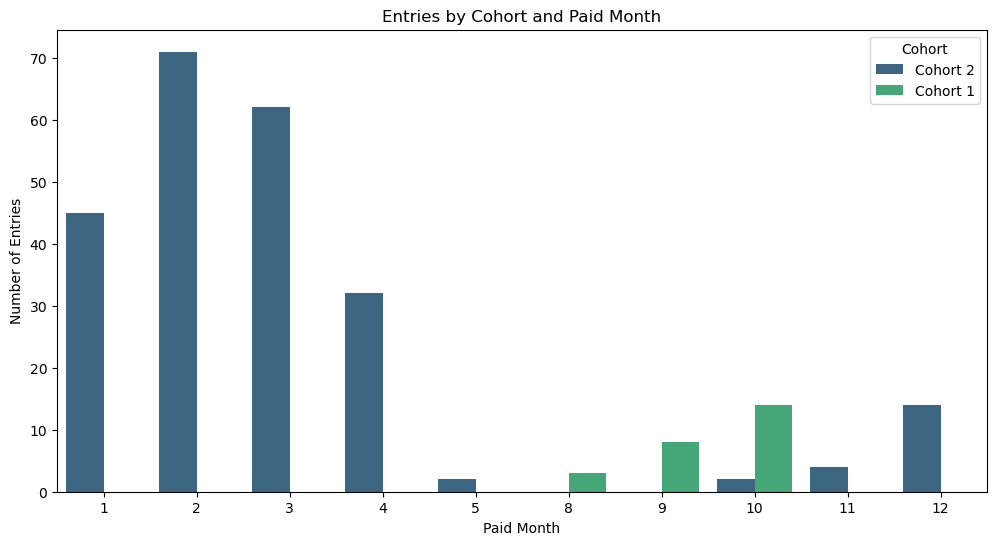

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='paid_month', hue='cohort', palette='viridis')
plt.title('Entries by Cohort and Paid Month')
plt.xlabel('Paid Month')
plt.ylabel('Number of Entries')
plt.legend(title='Cohort')
plt.show()

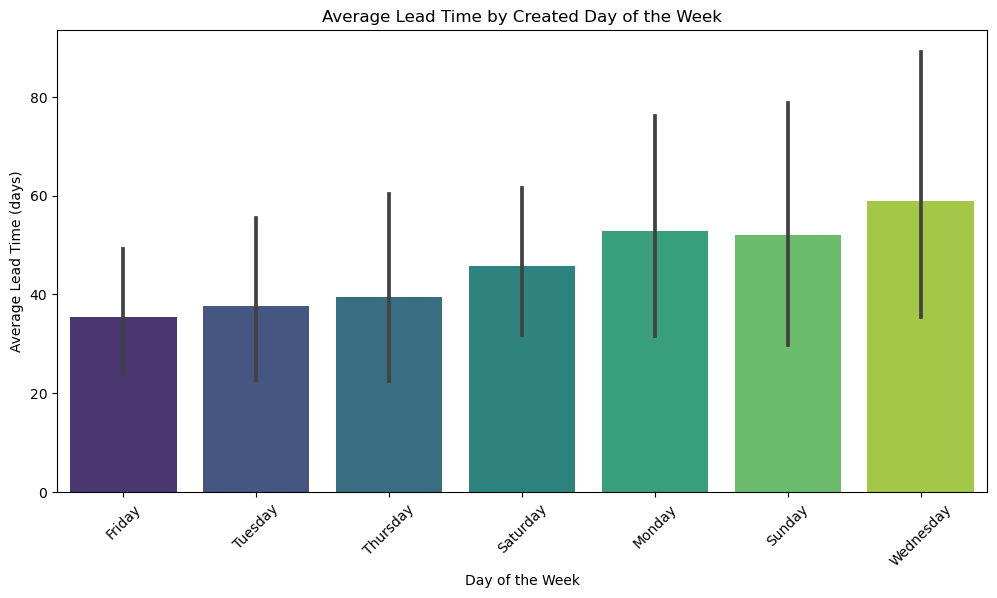

In [34]:
# Average Lead Time by Created Day of the Week
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='created_day', y='days', estimator='mean', palette='viridis')
plt.title('Average Lead Time by Created Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=45)
plt.show()

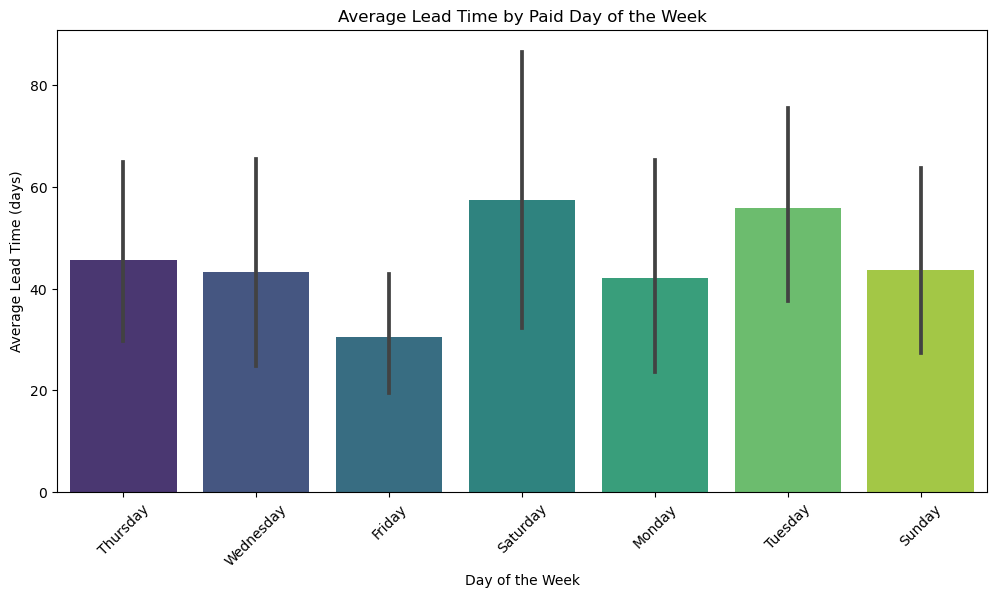

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='paid_day', y='days', estimator='mean', palette='viridis')
plt.title('Average Lead Time by Paid Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=45)
plt.show()

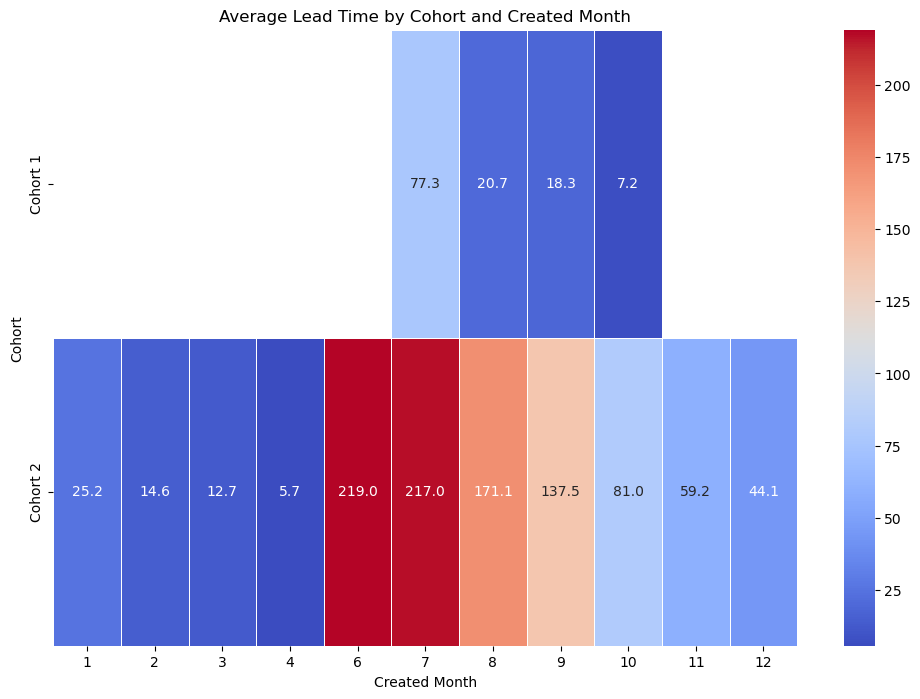

In [37]:
# Pivot table for average lead times by cohort and created month
pivot_table = df.pivot_table(values='days', index='cohort', columns='created_month', aggfunc='mean')
# heatmap on days and cohort
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Lead Time by Cohort and Created Month')
plt.xlabel('Created Month')
plt.ylabel('Cohort')
plt.show()

## Conclusion and Recommendations

### Conclusion
From our exploratory data analysis (EDA), we've gathered some key insights:

1. **Source Distribution**: Most of our leads are coming from Facebook, making it a crucial channel for attracting new leads. Other sources lag behind significantly in terms of lead volume.

2. **Lead Time Distribution**: A lot of leads convert (make payments) on the same day they are created. However, as time goes on, the number of conversions decreases. This suggests we're good at closing deals quickly but might face challenges with leads that take longer to convert.

3. **Cohort Analysis**: Different cohorts (groups of leads) show varying lead times, which means some campaigns or time periods are more effective than others.

4. **Agent Performance**: There's a noticeable difference in how long it takes different agents to convert leads. Some agents are much faster, while others take longer, indicating variability in their effectiveness.

5. **Day and Month Trends**: There are patterns in when leads are created and converted, pointing to possible seasonal trends or differences in behavior on specific days of the week.

### Recommendations

1. **Enhance Source Channels**: Given the strong performance of Facebook, we should consider increasing our efforts there. For other channels that aren't performing as well, we need to figure out why and develop strategies to improve them.

2. **Optimize Conversion Processes**: Since we have a high rate of same-day conversions, we should analyze what’s working well in these cases. Applying these insights to leads with longer conversion times could help us improve overall performance.

3. **Agent Training and Support**: The variation in agent performance suggests a need for training programs. Sharing best practices from top performers and providing support to agents who need it could help standardize performance across the board.

4. **Tailored Strategies for Different Cohorts**: Since different cohorts show different conversion patterns, we should develop specific strategies for each. This could involve personalized communication, offers, or follow-up routines.

5. **Investigate Temporal Trends**: The patterns we see in lead creation and conversion by day and month should be further explored. Understanding these trends can help us optimize the timing of our marketing efforts, staffing, and other operational decisions.

6. **Improve Data Quality**: Ensuring the accuracy and completeness of our data, especially around lead creation and payment dates, is crucial. High-quality data will enable us to make more reliable decisions.

By implementing these recommendations, we can improve our lead acquisition and conversion processes, optimize agent performance, and enhance overall efficiency in managing leads.